In [5]:
import pandas as pd

In [7]:
titanic = pd.read_csv(r'pythonDataAnalysis/data/train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

'PassengerId' : 승객번호, 'Survived' : 생존여부(0-사망, 1-생존), 'Pclass' : 객실등급(1,2,3), 'Name' : 승객 이름, 'Sex' : 성별, 'Age' : 나이, 'SibSp' : 함께 탑승한 형제와 배우자 수,
       'Parch' : 함께 탑승한 부모와 아이의 수, 'Ticket' : 티켓번호, 'Fare' : 요금, 'Cabin' : 객실번호, 'Embarked': 탑승항구(S, C, Q)

# 결측치
* 결측치 데이터 : 삭제, 다른 값으로 대체 

In [12]:
# 결측치 확인하기 

titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [18]:
# 결측데이터가 너무 많으면 데이터 분석에 의미가 없으므로 삭제함 
# 결측치 삭제 (Cabin 컬럼 삭제)

titanic.drop('Cabin', axis=1, inplace=True)

KeyError: "['Cabin'] not found in axis"

In [17]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [20]:
# 결측데이터 최빈값으로 대체하기 

titanic['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [23]:
titanic['Embarked'].fillna('S', inplace=True)

In [24]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [25]:
# 결측데이터를 평균값으로 대체 
# Age 열

titanic['Age'].mean()

np.float64(29.69911764705882)

In [27]:
titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)

C:\Users\B8-08\AppData\Local\Temp\ipykernel_14724\1013071036.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)


In [28]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# 데이터 그룹핑
* 항구별 객실등급 개수 출력
* 객실등급별 성별, 나이, 요금의 평균 구하기

In [38]:
# 항구별 객실등급 개수 출력

data_Embarked = titanic.groupby('Embarked', as_index=False)[['Pclass']].count()
data_Embarked

,Embarked,Pclass
0,C,168
1,Q,77
2,S,646


# 데이터 시각화 라이브러리 - matplotlib
* 설치: pip install matplotlib

In [40]:
%pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 8.0/8.0 MB 92.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 70.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 2.6/2.6 MB 79.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


<Axes: xlabel='Embarked'>

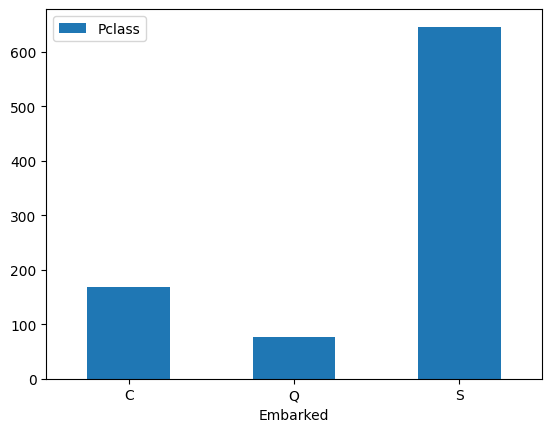

In [44]:
# pandas를 이용한 데이터 시각화
# DataFrame이름.plot(x, y)

data_Embarked.plot(kind='bar', x='Embarked', rot=0)

In [46]:
datasex = titanic.groupby(['Sex'], as_index=False)[['Fare', 'Age']].mean().sort_values('Fare', ascending=False)

<Axes: xlabel='Sex'>

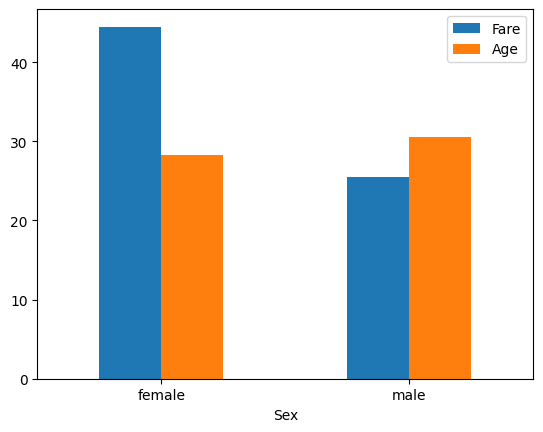

In [47]:
datasex.plot(kind='bar', x='Sex', rot=0)

In [37]:
# 객실등급별 성별, 나이, 요금의 평균 구하기

titanic.groupby(['Pclass', 'Sex'], as_index = False)[['Fare','Age']].mean().sort_values('Fare', ascending=False)

,Pclass,Sex,Fare,Age
0,1,female,106.125798,34.141405
1,1,male,67.226127,39.287717
2,2,female,21.970121,28.748661
3,2,male,19.741782,30.653908
4,3,female,16.118810,24.068493
5,3,male,12.661633,27.372153


# 꺾은선 차트
* plt.plot(데이터, 속성들)

객실등급별 생존여부 현황 그래프 작성

In [48]:
# 1단계: 시각화 라이브러리 불러오기

import matplotlib.pyplot as plt

In [56]:
# 2단계: 표시할 데이터셋 정하기 

# 0인 사람(사망)
data0 = titanic.query('Survived == 0').groupby('Pclass')[['Survived']].count()
print(data0)

# 1인 사람(생존)
data1 = titanic.query('Survived == 1').groupby('Pclass')[['Survived']].count()
print(data1)

# 데이터 합치기
data = pd.merge(data0, data1, on='Pclass')
data.columns=['Dead', 'Alive']
print(data)


        Survived
Pclass          
1             80
2             97
3            372
        Survived
Pclass          
1            136
2             87
3            119
        Dead  Alive
Pclass             
1         80    136
2         97     87
3        372    119


In [60]:
# 한글코드 불러오기 

plt.rcParams['font.family'] = 'Malgun Gothic'

<function matplotlib.pyplot.show(close=None, block=None)>

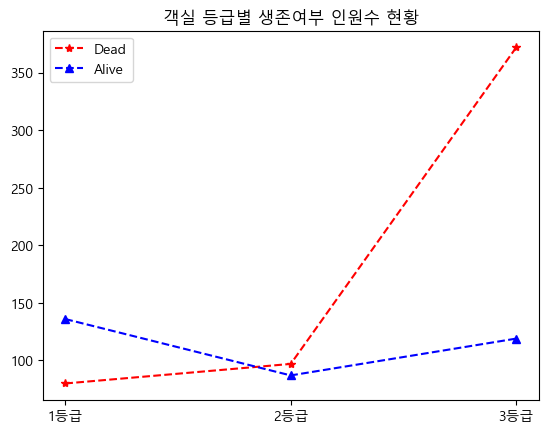

In [65]:
# 3단계: plot() 함수에 데이터 입력

plt.plot(data.index, data['Dead'], marker='*', linestyle='--', color='red', label='Dead')
plt.plot(data.index, data['Alive'], marker='^', linestyle='--', color='blue', label='Alive')
plt.xticks(data.index, ['1등급', '2등급', '3등급'])
plt.title('객실 등급별 생존여부 인원수 현황')
plt.legend()  # label 표시
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

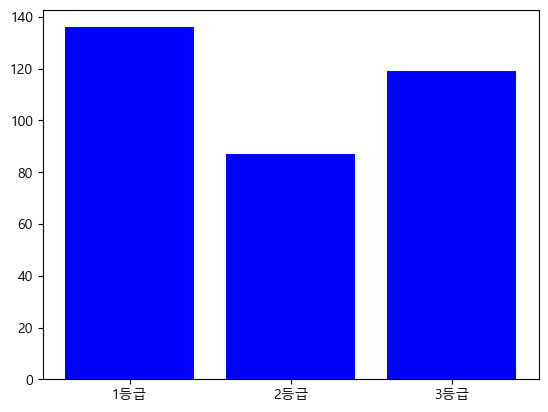

In [67]:
# 막대그래프 : 생존자

plt.bar(data.index, data['Alive'], color='blue', label='Alive')
plt.xticks(data.index, ['1등급', '2등급', '3등급'])
plt.show